# Topic 4: Classification

#### Classification is a versatile machine learning technique used in various applications, such as loan application, spam detection, image recognition, sentiment analysis, medical diagnosis, and many more. It is a supervised learning task because it relies on labeled data to learn and make predictions.

#### Distribution of Loans

In [6]:
import pandas as pd
%matplotlib inline
loan_data = pd.read_csv("loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


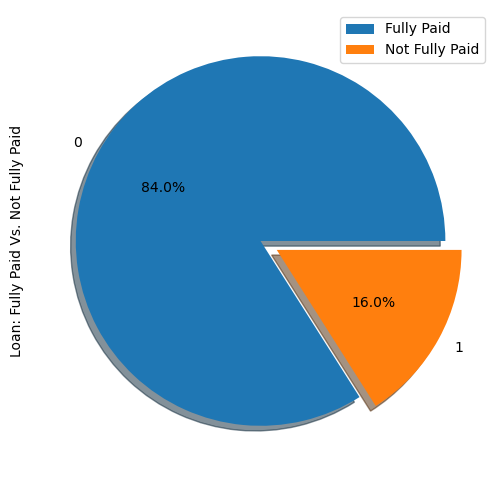

In [14]:
import matplotlib.pyplot as plt
# Helper function for data distribution
# Visualize the proportion of borrowers
def show_loan_distrib(data):
  count = ""
  if isinstance(data, pd.DataFrame):
      count = data["not.fully.paid"].value_counts()
  else:
      count = data.value_counts()


  count.plot(kind = 'pie', explode = [0, 0.1], 

              figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
  plt.ylabel("Loan: Fully Paid Vs. Not Fully Paid")
  plt.legend(["Fully Paid", "Not Fully Paid"])
  plt.show()
  # Visualize the proportion of borrowers
show_loan_distrib(loan_data)  

##### Variable Types

In [15]:
# Check column types
print(loan_data.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [16]:
# Check column types
print(loan_data.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [17]:
encoded_loan_data = pd.get_dummies(loan_data, prefix="purpose",   

                                   drop_first=True)
print(encoded_loan_data.dtypes)

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
purpose_small_business          uint8
dtype: object


In [20]:
X = encoded_loan_data.drop('not.fully.paid', axis = 1)
y = encoded_loan_data['not.fully.paid']



In [33]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify = y, random_state=2022)

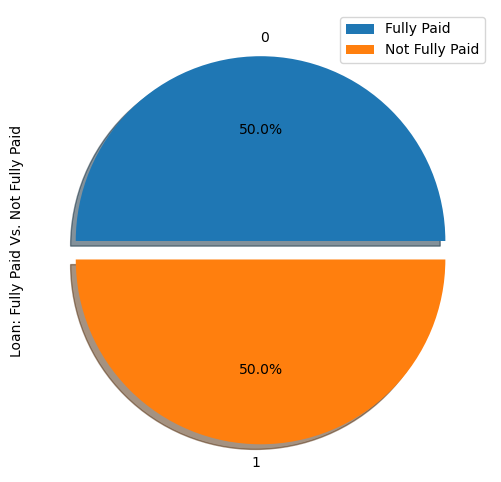

In [34]:
X_train_cp = X_train.copy()
X_train_cp['not.fully.paid'] = y_train
y_0 = X_train_cp[X_train_cp['not.fully.paid'] == 0]
y_1 = X_train_cp[X_train_cp['not.fully.paid'] == 1]
y_0_undersample = y_0.sample(y_1.shape[0])
loan_data_undersample = pd.concat([y_0_undersample, y_1], axis = 0)


# Visualize the proportion of borrowers
show_loan_distrib(loan_data_undersample)

In [52]:
!pip install -U imbalanced-learn
# check version number
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train,y_train)
# Visualize the proportion of borrowers
show_loan_distrib(y_train_SMOTE)

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\frank\anaconda3\Anaconda\Lib\site-packages\imblearn\utils\_validation.py)

In [ ]:
X = loan_data_undersample.drop('not.fully.paid', axis = 1)
y = loan_data_undersample['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state=2022)
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))